In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Representación de Imágenes

In [4]:
mnist = np.loadtxt("data/mnist1.5k.csv", delimiter=",")
d=mnist[:,1:785]
c=mnist[:,0]
print "dimension de las imagenes y las clases", d.shape, c.shape

dimension de las imagenes y las clases (1500, 784) (1500,)


Representamos una imagen por el histograma de grises. Es decir, por un vector de 255 valores conteniendo cuantos píxeles contiene la imagen de cada intensidad.

[590   0   0   0   0   1   0   1   1   0   0   0   0   2   0   0   0   0
   0   1   0   0   2   0   0   0   1   0   0   0   0   0   1   1   1   0
   2   0   1   0   0   0   1   0   1   0   0   2   0   0   0   0   1   0
   0   0   1   0   0   0   0   2   0   0   0   0   0   1   1   0   0   0
   1   0   0   0   0   1   0   0   0   0   0   1   0   0   1   3   2   0
   1   0   1   0   0   0   0   0   0   1   0   0   0   0   0   2   0   0
   0   0   0   0   0   0   2   0   1   0   0   0   0   0   0   0   0   0
   0   0   1   0   0   2   0   1   1   0   0   2   1   0   0   1   0   0
   0   0   0   0   1   0   0   0   1   0   0   1   1   3   1   0   1   1
   0   0   1   1   0   0   0   1   1   1   0   0   1   0   1   0   0   0
   0   1   0   0   2   0   1   1   0   0   1   0   2   0   0   0   0   0
   0   0   0   0   0   2   0   0   0   1   2   0   1   0   0   0   0   0
   0   0   0   0   0   0   0   1   0   0   1   0   2   1   0   0   1   0
   0   1   3   0   1   1   1   1   1   0   4   3   

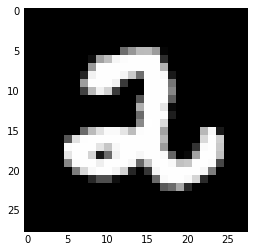

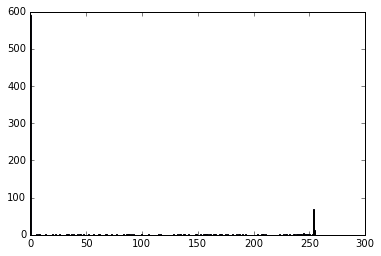

In [5]:
random_idx = np.random.randint(d.shape[0])
print np.histogram(d[random_idx], bins=255)[0]
print d[random_idx]
plt.imshow(d[random_idx].reshape(28,28),interpolation="nearest", cmap = plt.cm.Greys_r)
plt.figure()
plt.hist(d[random_idx], bins=255);

Convertimos cada imagen a un histograma de grises

In [5]:
d_hist = np.zeros((d.shape[0], 255))
for i in range(d.shape[0]):
    d_hist[i] = np.histogram(d[i], bins=255)[0]
print d_hist.shape

(1500, 255)


Hacemos una descomposición en cien valores singulares. Se calcula cuales son las 100 métricas de cada imagen que son estadísticamente más significativas.

In [6]:
import scipy.linalg as la

(U,s,V)=la.svd(d)
d_svd = U[:,0:100]
print d_svd.shape

(1500, 100)


Clasificamos con los pixeles originales

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

test_size = 0.2

d_train, d_test, c_train, c_test = cross_validation.train_test_split(d, 
                                                                     c, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))
g = GaussianNB()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

acierto en train 0.628333333333
acierto en test  0.563333333333


Clasificamos con el histograma. Funciona mucho peor, parece que perdemos demasiada información al representar las imágenes de esta manera.

In [8]:
d_train, d_test, c_train, c_test = cross_validation.train_test_split(d_hist, 
                                                                     c, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))
g = GaussianNB()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

acierto en train 0.54
acierto en test  0.186666666667


Clasificamos con la descomposición en valores singulares. Funciona mucho mejor, esta representación parece que preserva y resalta información importante de las imágenes. 

In [9]:
test_size = 0.2

d_train, d_test, c_train, c_test = cross_validation.train_test_split(d_svd, 
                                                                     c, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))
g = GaussianNB()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

acierto en train 0.9
acierto en test  0.83


In [ ]:
t